In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column width

In [4]:
ratings = pd.read_csv("C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/ml-100k/ml-100k/u.data", sep='\t', header=None)
ratings.columns = ['userid','movieId','rating','timestamp']
ratings

,userid,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [5]:
avg_mov_rating = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False).reset_index()
count_mov_rating = ratings.groupby('movieId')['rating'].count().sort_values(ascending=True).reset_index()
movies_rating_count_avg = avg_mov_rating.merge(count_mov_rating, on = 'movieId')
movies_rating_count_avg.columns = ['MovieID', 'Average Rating', 'Rating Count']
movies_rating_count_avg

,MovieID,Average Rating,Rating Count
0,814,5.0,1
1,1599,5.0,1
2,1201,5.0,1
3,1122,5.0,1
4,1653,5.0,1
...,...,...,...
1677,1568,1.0,1
1678,1567,1.0,1
1679,1566,1.0,1
1680,1565,1.0,1


In [6]:
column_names = [
    "MovieID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDbURL",
    "Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]


movies = pd.read_csv(
    "C:/Users/Ng Yong Jian/OneDrive - Nanyang Technological University/Desktop/NTU/Y3S1/SC4020 Data Analytics & Mining/Assignment/Assignment1/ml-100k/ml-100k/u.item",
    sep='|',
    header=None,
    names=column_names,
    encoding='latin-1' 
)

movies

,MovieID,Title,ReleaseDate,VideoReleaseDate,IMDbURL,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%20(1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+(1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Crazy%20(1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
columns_to_drop = ['ReleaseDate', 'VideoReleaseDate', 'IMDbURL']
movies_data = movies.drop(columns = columns_to_drop, axis = 1)
movies_df = pd.merge(movies_data, movies_rating_count_avg, how="inner", on=["MovieID"])
movies_df

,MovieID,Title,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Average Rating,Rating Count
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,452
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,131
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,90
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,209
4,5,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,1
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3.000000,1
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.000000,1
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [9]:
genre_columns = ['Unknown', 'Action', 'Adventure', 'Animation', "Children's",
                  'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                  'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                  'War', 'Western']

scaler = StandardScaler()
movies_df[genre_columns] = scaler.fit_transform(movies_df[genre_columns])

In [64]:
k = 30
knn_model = NearestNeighbors(n_neighbors=k, metric='hamming', algorithm='auto')
knn_model.fit(movies_df[genre_columns])

NearestNeighbors(metric='hamming', n_neighbors=30)

In [65]:
def recommend_movies(movies_title, num_recommendations=10):
    movies_index = movies_df[movies_df['Title'] == movies_title].index[0]
    
    movies_genre = movies_df.loc[movies_index, genre_columns].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(movies_genre, n_neighbors=num_recommendations + 1)
    
    recommended_movies_indices = indices[0][1:]
    
    recommended_movies = movies_df.iloc[recommended_movies_indices]['Title'].tolist()
    return recommended_movies_indices, recommended_movies

In [66]:
input_movie_title = 'Toy Story (1995)'
recommended_movies_indices, recommended_movies = recommend_movies(input_movie_title)

print('Recommended movies indexes:')
print(recommended_movies_indices)
print()

print(f"Recommended movies for '{input_movie_title}':")
for i, movie in enumerate(recommended_movies, start=1):
    print(f"{i}. {movie}")

Recommended movies indexes:
[ 421 1411  794  101 1408  968  382  224  137  138]

Recommended movies for 'Toy Story (1995)':
1. Aladdin and the King of Thieves (1996)
2. Land Before Time III: The Time of the Great Giving (1995) (V)
3. Richie Rich (1994)
4. Aristocats, The (1970)
5. Swan Princess, The (1994)
6. Winnie the Pooh and the Blustery Day (1968)
7. Flintstones, The (1994)
8. 101 Dalmatians (1996)
9. D3: The Mighty Ducks (1996)
10. Love Bug, The (1969)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [70]:
recommended_movies_data = movies_df.iloc[recommended_movies_indices]

recommended_movies_data

,MovieID,Title,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Average Rating,Rating Count
421,422,Aladdin and the King of Thieves (1996),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.846154,26
1411,1412,Land Before Time III: The Time of the Great Giving (1995) (V),0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.666667,6
794,795,Richie Rich (1994),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.428571,21
101,102,"Aristocats, The (1970)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.129630,54
1408,1409,"Swan Princess, The (1994)",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.857143,7
968,969,Winnie the Pooh and the Blustery Day (1968),0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.800000,75
382,383,"Flintstones, The (1994)",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.064516,31
224,225,101 Dalmatians (1996),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.908257,109
137,138,D3: The Mighty Ducks (1996),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.578947,19
138,139,"Love Bug, The (1969)",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.780000,50


In [48]:
def recommend_movies(knn_model, movies_title, num_recommendations=30):
    movies_index = movies_df[movies_df['Title'] == movies_title].index[0]
    
    movies_genre = movies_df.loc[movies_index, genre_columns].values.reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(movies_genre, n_neighbors=num_recommendations + 1)
    
    recommended_movies_indices = indices[0][1:]
    
    recommended_movies = movies_df.iloc[recommended_movies_indices]['Title'].tolist()
    return recommended_movies_indices, recommended_movies

In [61]:
k_values = range(1, 101)

common_recommendations = {}

for k in k_values:
    # Create a new k-NN model with the current k value
    knn_model = NearestNeighbors(n_neighbors=k, metric='hamming', algorithm='auto')
    knn_model.fit(movies_df[genre_columns])
    
    # Recommend movies for the input movie title
    recommended_movies_indices, _ = recommend_movies(knn_model, input_movie_title, num_recommendations=1000)
    
    # Store the recommended movie indices for the current k value
    common_recommendations[k] = recommended_movies_indices

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

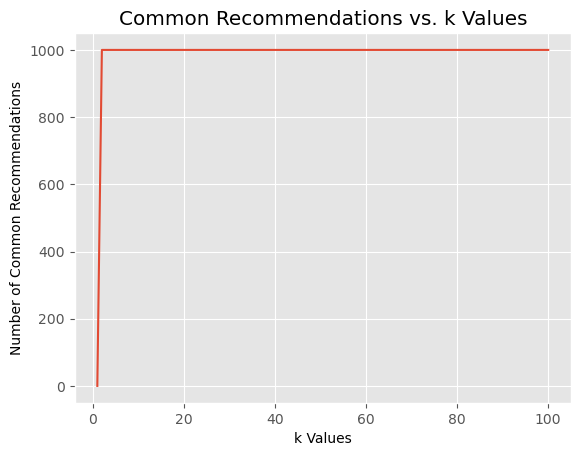

In [63]:
# Calculate the number of common recommendations between consecutive k values
common_recommendations_count = {}
prev_recommendations = set()

for k_test in k_values:
    current_recommendations = set(common_recommendations[k_test])
    common_count = len(prev_recommendations.intersection(current_recommendations))
    common_recommendations_count[k_test] = common_count
    prev_recommendations = current_recommendations

# Plot the results
plt.plot(k_values, list(common_recommendations_count.values()))
plt.xlabel("k Values")
plt.ylabel("Number of Common Recommendations")
plt.title("Common Recommendations vs. k Values")
plt.show()